# Exploratory Data Analysis - EDA

EDA is applied to investigate the data and summarize the key insights. It will give you the basic understanding of your data, it’s distribution, null values and much more.
You can either explore data using graphs or through some python functions.
There will be two type of analysis. Univariate and Bivariate. In the univariate, you will be analyzing a single attribute. But in the bivariate, you will be analyzing an attribute with the target attribute.
In the non-graphical approach, you will be using functions such as shape, summary, describe, isnull, info, datatypes and more.
In the graphical approach, you will be using plots such as scatter, box, bar, density and correlation plots.


# Load the Data

Well, first things first. We will load the titanic dataset into python to perform EDA.


In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

#Load the data
df = sns.load_dataset('titanic')

In [2]:
#View the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [25]:
x = np.array(df.age)

In [26]:
x[0:20]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.,  4., 58., 20.,
       39., 14., 55.,  2., nan, 31., nan])

<AxesSubplot:ylabel='Count'>

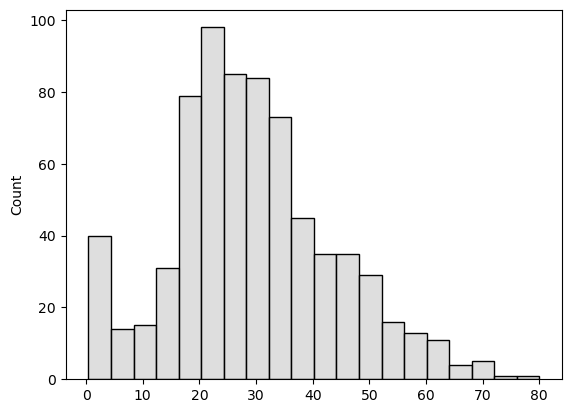

In [27]:
sns.histplot(x, color = 'lightgray')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [28]:
xbar = x.mean()
xbar

nan

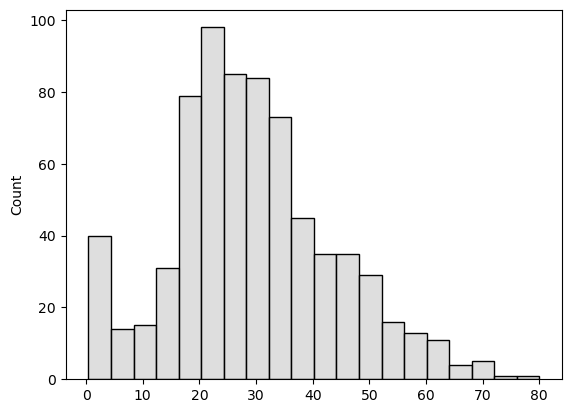

In [29]:
ax = sns.histplot(x, color = 'lightgray')
ax.axvline(x = np.mean(x), color='orange')

What is the issue? The issue is that the np.mean function on an array with NaN values results in NaN. In order to get results, you need to use the np.nanmean function (there is also a np.nanmedian function)

In [30]:
np.mean(x)

nan

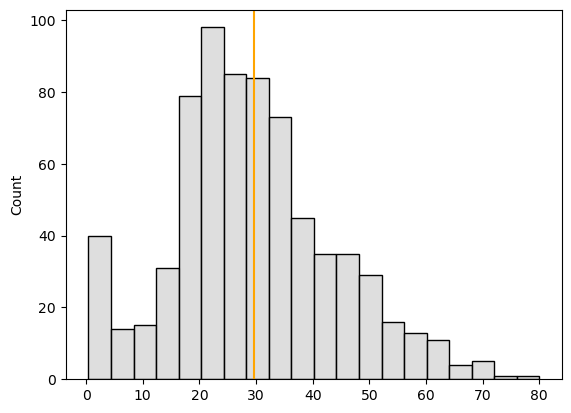

In [33]:
ax = sns.histplot(x, color = 'lightgray')
ax.axvline(x = np.nanmean(x), color='orange')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [32]:
np.nanmedian(x) 

28.0

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

In [13]:
np.mean(x)

29.69911764705882

In [90]:
x = df.fare

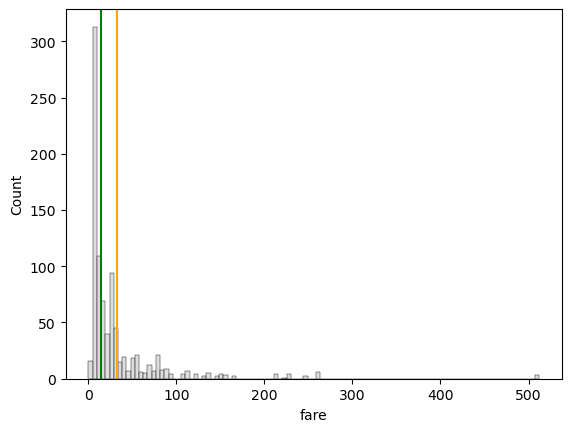

In [91]:
ax = sns.histplot(x, color = 'lightgray')
ax.axvline(x = np.nanmean(x), color='orange')
ax.axvline(x = np.nanmedian(x), color='green')

### Adding a single outlier

Let's include an outlier to the age variable. When changing the age of 22 into 22,222 we see two problems arising. First, we can no longer see the distribution on the plot because the range is way too large. So we need to zoom into the region with many points. The second problem is that the mean and the standard deviation measures are affected a lot by these outlier values.

In [84]:
#We keep a copy of the dataframe to alter it for demonstration
df_noisy = df.copy()

#Outliers
df_noisy.loc[0, 'age'] = 22222

In [85]:
x_noisy = np.array(df_noisy.age)

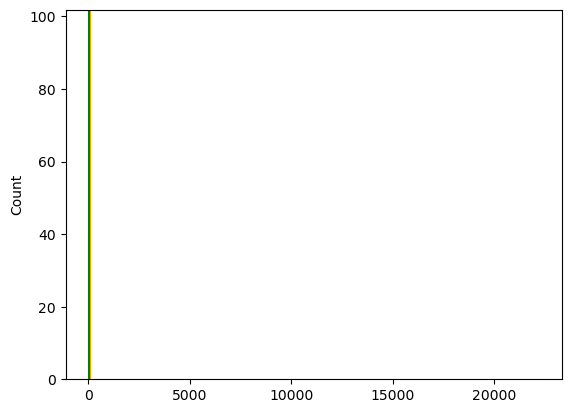

In [86]:
ax = sns.histplot(x_noisy, color = 'lightgray')
ax.axvline(np.nanmean(x_noisy), color='orange')
ax.axvline(np.nanmedian(x_noisy), color='green')

#### Identify outliers

If the variable meaning is clear, like the variable *age*, then outliers can be removed simply using common sense. For the variable age, for instance, we could decide to remove all negative values and all values above 100 and replace them by np.nan. 

When the meaning is not as clear, we can also identify outliers by looking at the data distribution. There are two common ways of identifying outliers. The first one uses **mean** and **standard deviation**. The other one uses **median** and **interquantile range**. Let's begin by the quantile strategy.

In [94]:
import numpy as np
 
q1 = np.nanpercentile(x_noisy, 25)
q3 = np.nanpercentile(x_noisy, 75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = (x_noisy < q1 - threshold) | (x_noisy > q3 + threshold)
 
print("Outliers of x_noisy is : \n", x_noisy[outliers])

Outliers of x_noisy is : 
 [22222.     66.     65.     71.     70.5    65.     65.     71.     80.
    70.     70.     74. ]


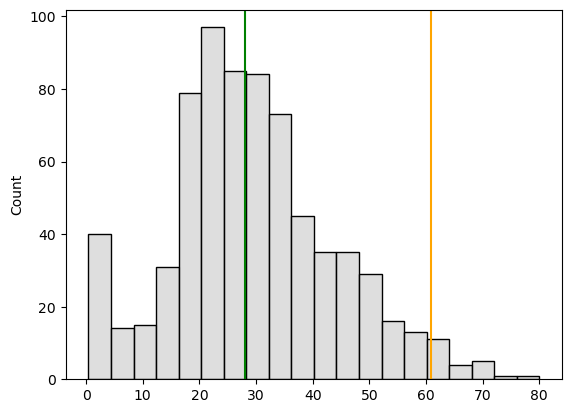

In [83]:
ax = sns.histplot(x_noisy[~outliers], color = 'lightgray')
ax.axvline(np.nanmean(x_noisy), color='orange')
ax.axvline(np.nanmedian(x_noisy), color='green')

In [88]:
# What about the standard deviation:

np.nanstd(x)

14.516321150817316

In [89]:
np.nanstd(x_noisy)

830.0706693545154

As we can see, the mean is significantly affected by the outlier value, way more than the median is. This is also true for the standard deviation. Since mean and standard deviation are affected a lot more by the presence of outliers than the quantiles are, the method for identifying outliers that is based on quantiles is to be favoured.

# Titanic 3

Our data is ready to be explored!

### Basic information about data - EDA

The df.info() function will give us the basic information about the dataset: the number of null values, datatypes, and memory usage. For any data, it is good to start by knowing its information. Let’s see how it works with our data. 

In [17]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [28]:
#We keep a copy of the dataframe to alter it for demonstration
df_modified = df.copy()
df_modified.loc[10:20, 'parch'] = np.nan
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               616 non-null    float64
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 49.1+ KB


### Describe

Using this function, you can see descriptive statistics.

In [29]:
#Describe the data - Descriptive statistics.

df.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


If this data has all been manually entered, errors are possible. For the first entry of the dataframe, let's imagine the age '22' has been manually entered as '22222'. What are the descriptive statistics showing?

In [39]:
#We keep a copy of the dataframe to alter it for demonstration
df_modified = df.copy()
df_modified.loc[0, 'age'] = 22222
df_modified.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,65.038006,0.545455,0.379585,34.385399
std,0.487582,886.365608,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,22222.000000,8.000000,5.000000,512.329200


As we can see, an important outlier can drastically change the mean and the standard deviation of the variable. The mean of the age went from 29.6 to 65. However, the quartiles are unchanged. Quartiles are more robust to such problems with the data.

| Sensitive to outliers    | Robust to outliers |
| -------- | ------- |
|  -  | Count (number of entries)    |
| Mean |  Median (quantile 50%)     |
| Minimum    |  Low quantile (5%)  |
| Maximum    |  High quantile (95%)   |
| Range  |  Range from quantiles   |
| -  |  Mode   |

### Duplicate records?

You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data.


In [40]:
#Find the duplicates

df.duplicated().sum()

69

This tells us that 69 rows have twin rows. We can look at these rows here. In this problem, duplicated rows is not an issue as it is not indicative of data entry issues. If the names and/or addresses of the passengers were part of the data, duplicated rows would be indicative of data collection problems. Let's look at the duplicated rows.

In [42]:
df[df.duplicated()]

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
59,0,male,28.0,0,0,7.8958,Third,unknown,Southampton,y
60,0,male,28.0,0,0,8.0500,Third,unknown,Southampton,y
68,0,male,28.0,0,0,8.0500,Third,unknown,Southampton,y
73,0,male,28.0,0,0,8.0500,Third,unknown,Southampton,y
79,0,male,28.0,0,0,7.8958,Third,unknown,Southampton,y
...,...,...,...,...,...,...,...,...,...,...
596,0,male,28.0,8,2,69.5500,Third,unknown,Southampton,n
612,0,male,26.0,0,0,7.8958,Third,unknown,Southampton,y
619,0,male,19.0,0,0,7.8958,Third,unknown,Southampton,y
620,0,male,28.0,0,0,7.8958,Third,unknown,Southampton,y


So how many unique rows do we have? Which rows a duplication of each other? In order to view this, we can group identical rows together by grouping over all columns - *list(df.colunms)* - and counting the resulting rows.

In [60]:
df_row_counts = df.groupby(list(df.columns)).size().reset_index(name='RowCount')

In [61]:
df_row_counts[df_row_counts.RowCount>1]

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,RowCount
25,0,female,28.00,3,1,25.4667,Third,unknown,Southampton,n,3
26,0,female,28.00,8,2,69.5500,Third,unknown,Southampton,n,2
70,0,male,17.00,0,0,8.6625,Third,unknown,Southampton,y,2
87,0,male,19.00,0,0,7.8958,Third,unknown,Southampton,y,2
110,0,male,22.00,0,0,7.2500,Third,unknown,Southampton,y,2
120,0,male,23.00,0,0,13.0000,Second,unknown,Southampton,y,2
132,0,male,25.00,0,0,7.0500,Third,unknown,Southampton,y,2
136,0,male,25.00,0,0,13.0000,Second,unknown,Southampton,y,2
141,0,male,26.00,0,0,7.8958,Third,unknown,Southampton,y,2
149,0,male,28.00,0,0,0.0000,Second,unknown,Southampton,y,5


### Unique values

You can find the number of unique values in the particular column using unique() function in python.

In [64]:
#unique values

df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [66]:
df['survived'].unique()

array([0, 1])

In [67]:
df['sex'].unique()

array(['male', 'female'], dtype=object)


The unique() function has returned the unique values which are present in the data and it is pretty much cool!

### Visualize the Unique counts - categorical

Yes, you can visualize the unique values present in the data. For this, we will be using the seaborn library. You have to call the sns.countlot() function and specify the variable to plot the count plot.


<AxesSubplot:xlabel='sex', ylabel='count'>

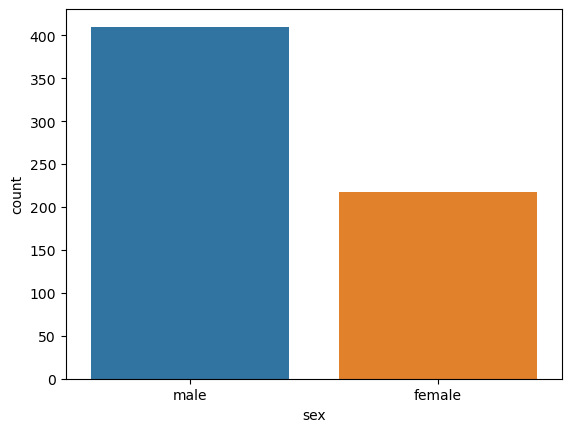

In [76]:
#Plot the unique values

sns.countplot(data=df, x='sex')

<AxesSubplot:xlabel='survived', ylabel='count'>

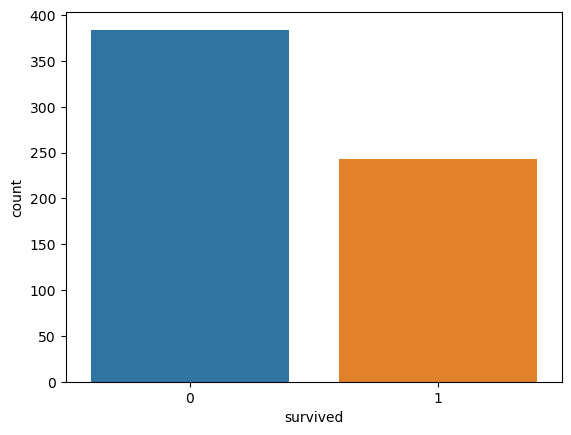

In [77]:
#Plot the unique values

sns.countplot(data=df, x='survived')

That’s great! You are doing good. It is as simple as that. Though EDA has two approaches, a blend of graphical and non-graphical will give you the bigger picture altogether.

### Find the Null values

Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.


In [ ]:
df.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [ ]:
#We keep a copy of the dataframe to alter it for demonstration
df_modified = df.copy()
df_modified.loc[10:20, 'parch'] = np.nan
df_modified.isnull().sum()

survived               0
sex                    0
age                    0
n_siblings_spouses     0
parch                 11
fare                   0
class                  0
deck                   0
embark_town            0
alone                  0
dtype: int64

Oh no, we have some null values in the ‘Age’ and ‘Cabin’ variables. But, don’t worry. We will find a way to deal with them soon.

### Replace the Null values

Hey, we got a replace() function to replace all the null values with a specific data. It is too good!

In [ ]:
# Replacing null values
df_modified.replace(np.nan, 0 ,inplace = True)
df_modified.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

Replacing null values can be done in different ways, and it very depends on external knowledge about the variable's meaning. One very common thing to do, is to replace the null values by the **mode** of the variable, that is the most common value.

### Mode

In [ ]:



9. A quick box plot

You can create a box plot for any numerical column using a single line of code.

#Boxplot

df[['Fare']].boxplot()

Eda Boxplot
10. Correlation Plot - EDA

Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

#Correlation 

df.corr()

Corr Matrix

This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated.

You can even visualize the correlation matrix using seaborn library as shown below.

#Correlation plot

sns.heatmap(df.corr())

Sns Correlation Plot
Ending Note - EDA

EDA is the most important part of any analysis. You will get to know many things about your data. You will find answers to your most of the questions with EDA. I have tried to show most of the python functions used for exploring the data with visualizations. I hope you got something from this article.

That’s all for now! Happy Python :)